In [3]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns 
warnings.filterwarnings('ignore')

In [112]:
dataset=pd.read_csv('train.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

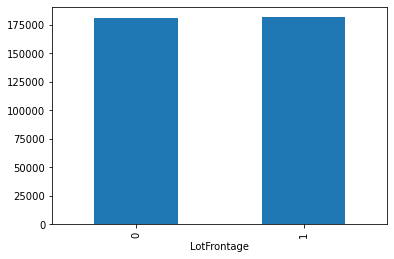

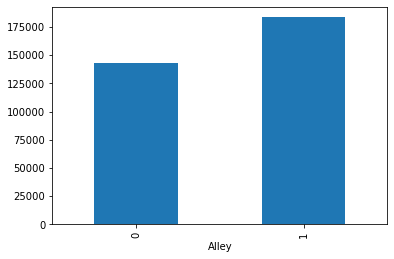

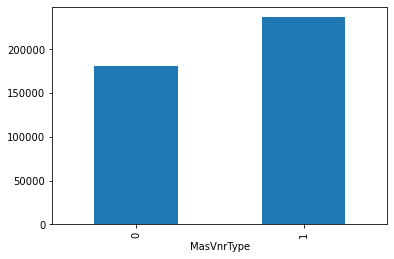

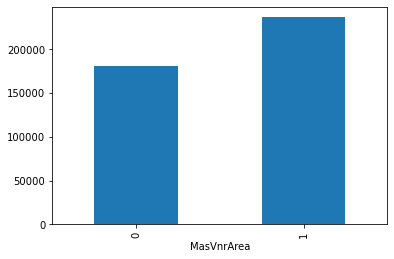

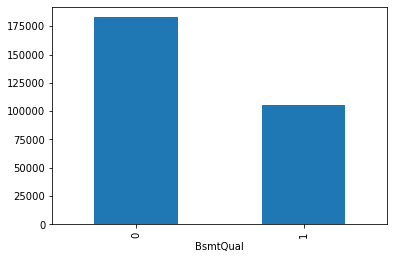

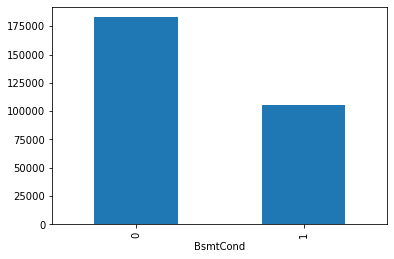

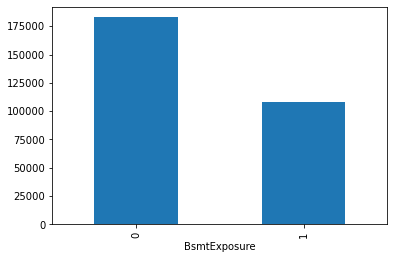

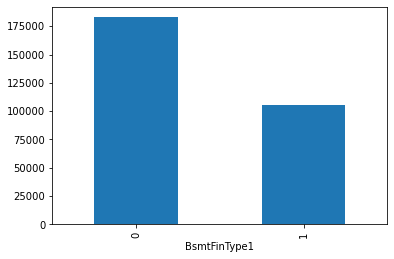

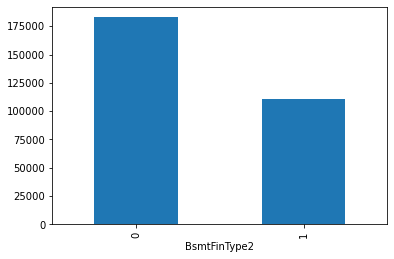

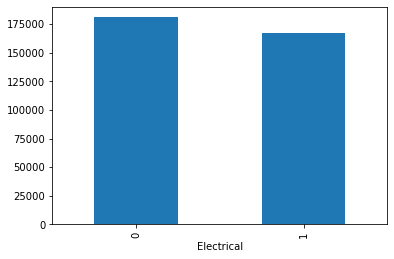

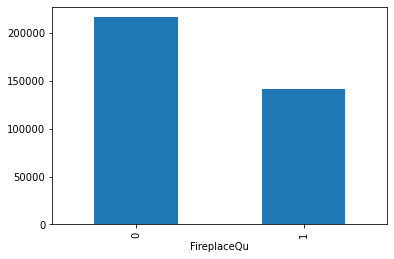

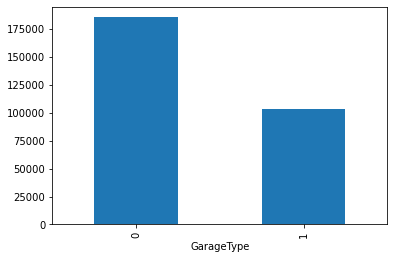

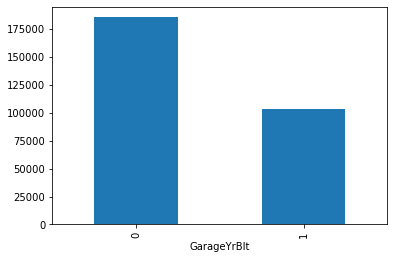

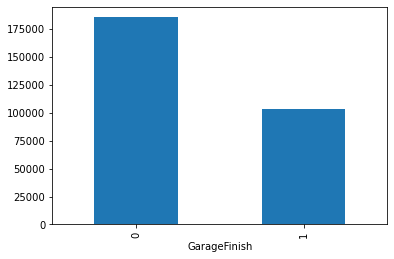

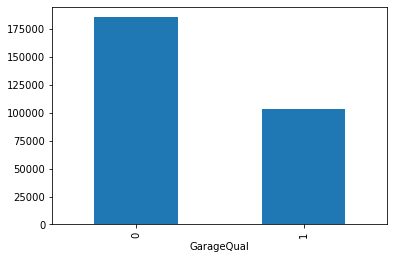

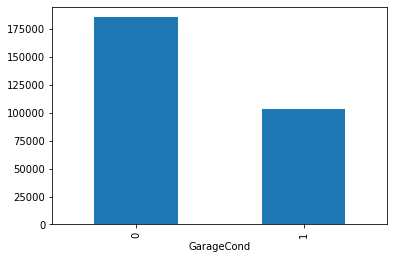

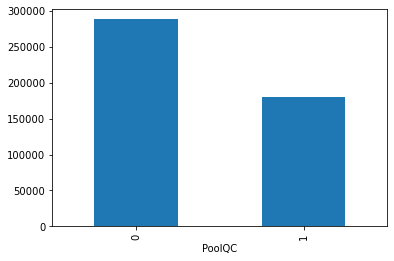

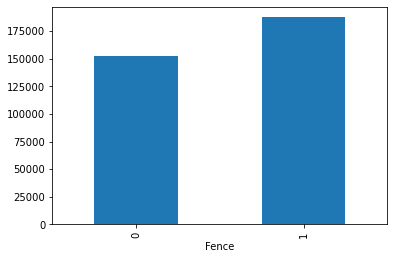

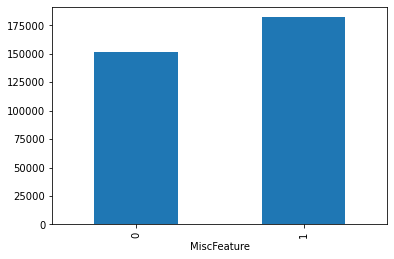

In [61]:
for features in dataset.columns:
    data=dataset.copy()
    if(data[features].isnull().sum()>0):
        data[features]=np.where(data[features].isnull(),1,0)
        data.groupby(features)['SalePrice'].mean().plot.bar()
        plt.show()

In [113]:
num_feature=[feature for feature in dataset.columns if dataset[feature].dtypes!="O"]
num_feature

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [117]:
not_needed=['Id','SalePrice']
for i in not_needed:
    num_feature.remove(i)
num_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [114]:
obj_feature=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
obj_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [116]:
print(len(num_feature))
print(len(obj_feature))
print("Sum = ",len(num_feature)+len(obj_feature))
print(len(dataset.columns))

38
43
Sum =  81
81


In [22]:
#frist we'll look into the numberical features

In [43]:
year_vals=[featrues for featrues in num_feature if 'Yr' in featrues or 'Year' in featrues ]
year_vals

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [44]:
for i in year_vals:
    num_feature.remove(i)

In [45]:
categoricals=[features for features in num_feature if len(dataset[features].unique())<25]
categoricals

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [49]:
continuous=[features for features in num_feature if features not in categoricals+year_vals]
continuous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [50]:
#we have divided the numberical columns into 3 sub groups ,
# continuous values(continuous) , categorical features(categoricals) , year conitanings (year_vals)

In [52]:
#now we'll see the relationship between them with respect to the target column ('SalePrice')

In [93]:
for features in categoricals:
    print("{} has {} categories".format(features,len(data[features].unique())))

MSSubClass has 15 categories
OverallQual has 10 categories
OverallCond has 9 categories
LowQualFinSF has 24 categories
BsmtFullBath has 4 categories
BsmtHalfBath has 3 categories
FullBath has 4 categories
HalfBath has 3 categories
BedroomAbvGr has 8 categories
KitchenAbvGr has 4 categories
TotRmsAbvGrd has 12 categories
Fireplaces has 4 categories
GarageCars has 5 categories
3SsnPorch has 20 categories
PoolArea has 8 categories
MiscVal has 21 categories
MoSold has 12 categories


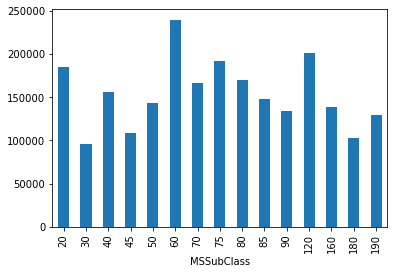

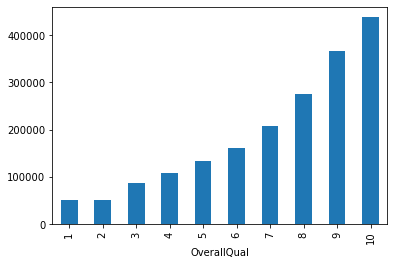

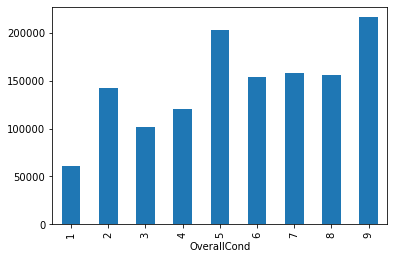

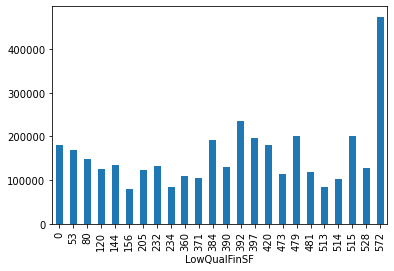

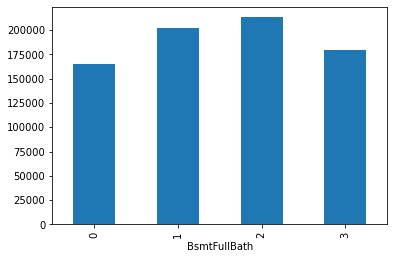

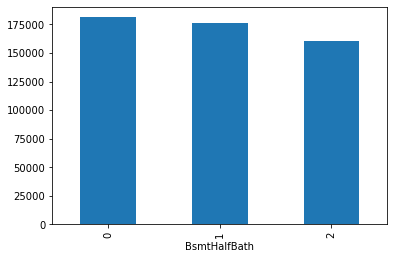

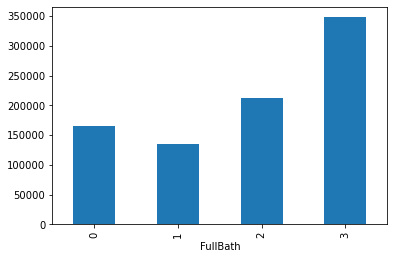

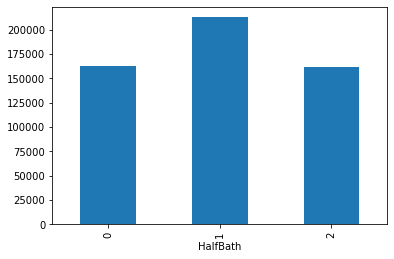

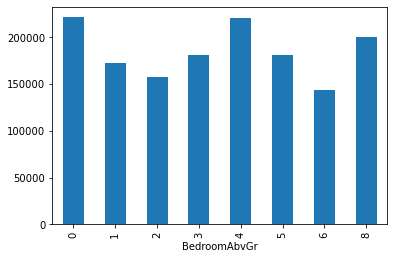

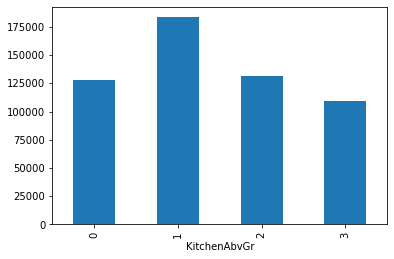

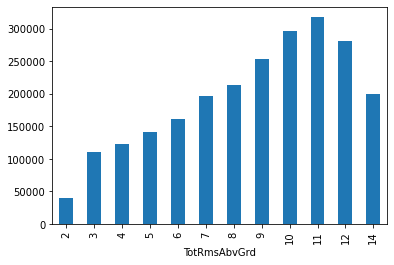

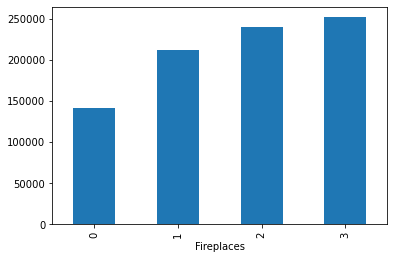

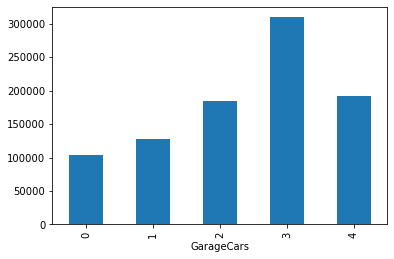

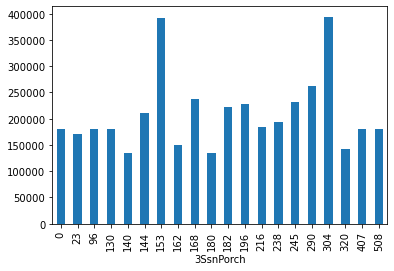

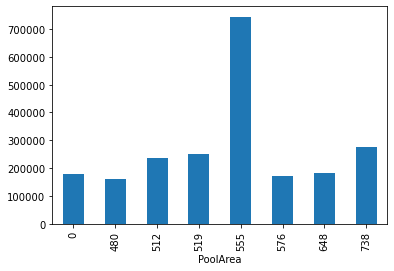

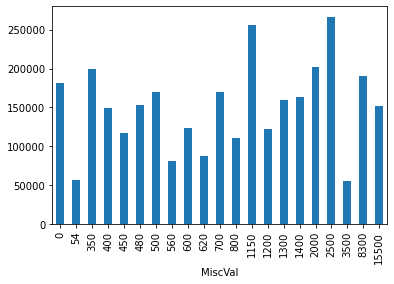

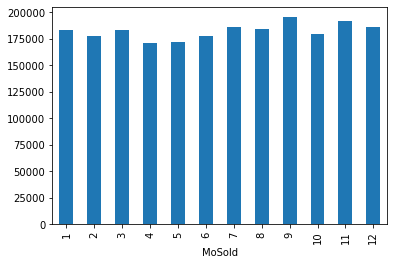

In [64]:
for features in categoricals:
    dataset.groupby(features)['SalePrice'].mean().plot.bar()
    plt.show()

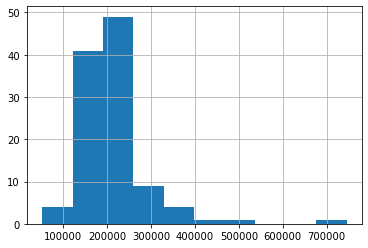

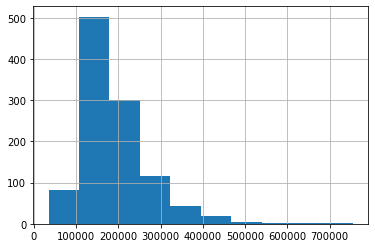

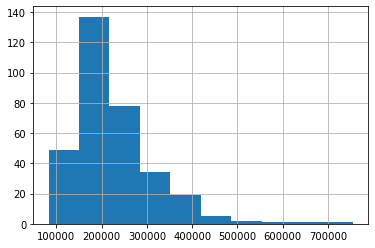

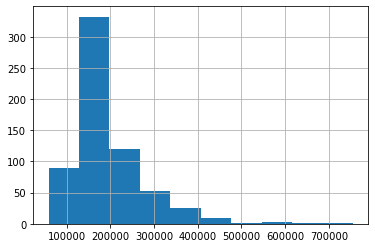

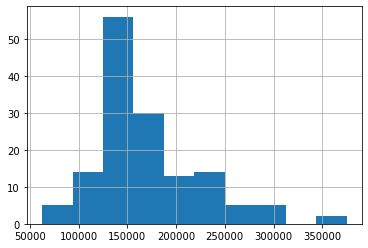

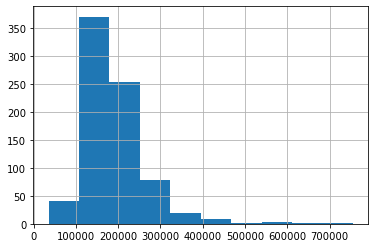

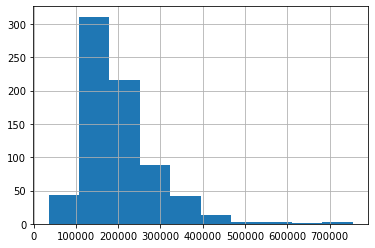

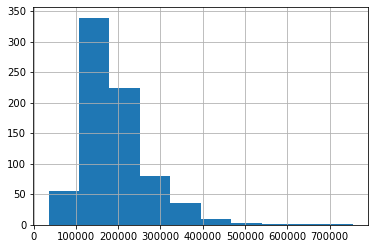

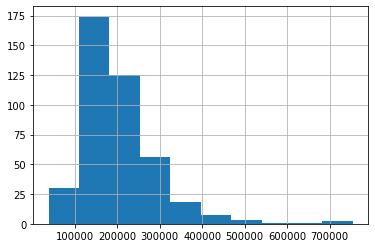

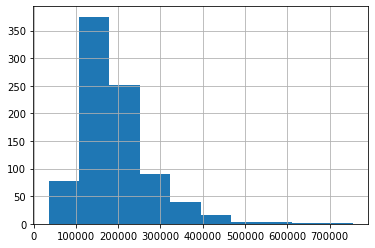

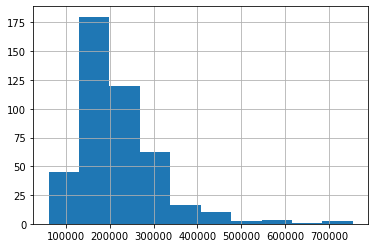

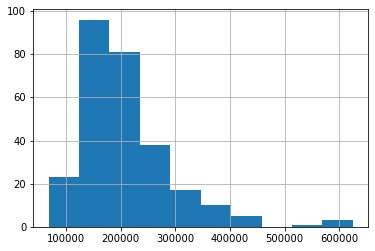

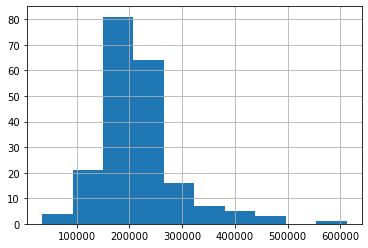

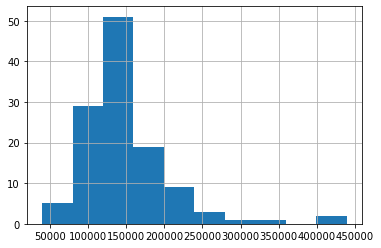

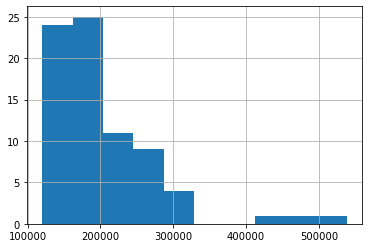

In [65]:
for features in continuous:
    dataset.groupby(features)['SalePrice'].mean().hist()
    plt.show()

In [66]:
year_vals

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [83]:
data=dataset.copy()
for i in year_vals:
    if i!='YrSold':
        data[i]=data['YrSold']-data[i]

In [84]:
data[year_vals].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [71]:
dataset[year_vals].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


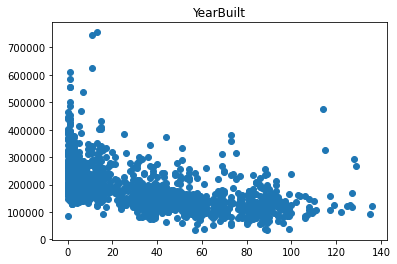

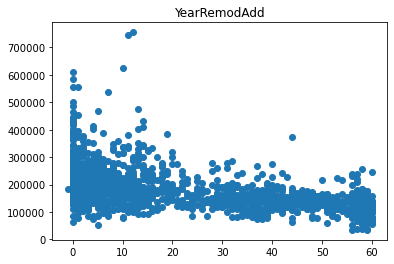

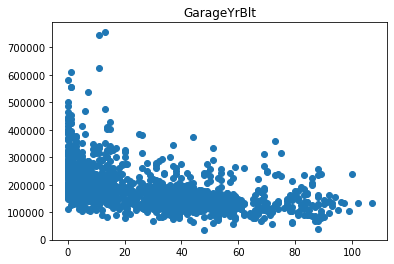

In [87]:
for i in year_vals:
    if i!='YrSold':
        plt.scatter(data[i],data['SalePrice'])
        plt.title(i)
        plt.show()

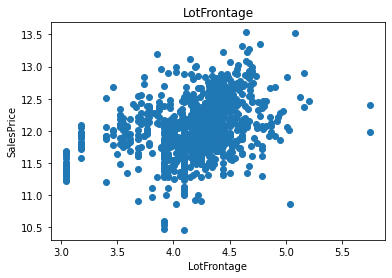

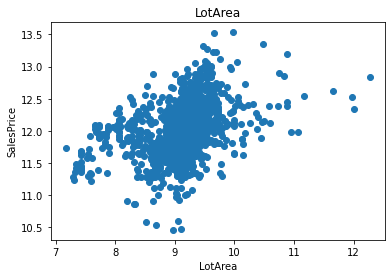

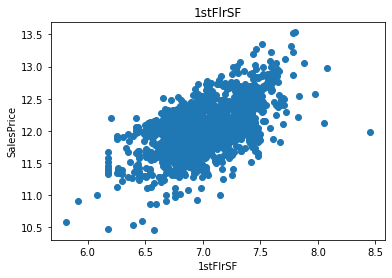

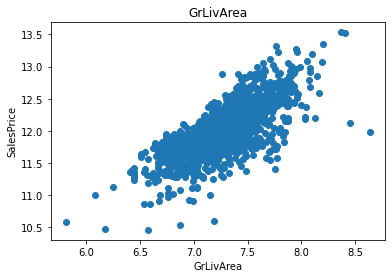

In [88]:
for feature in continuous:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [94]:
#outliers

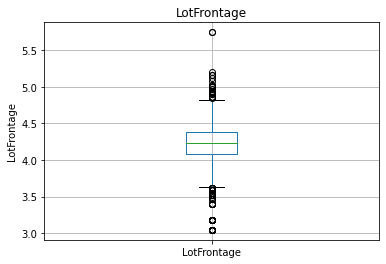

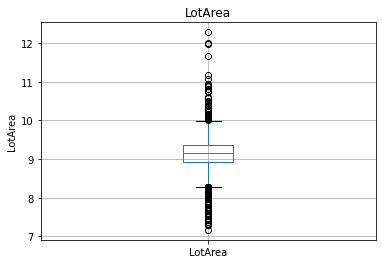

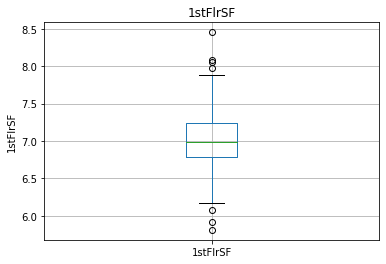

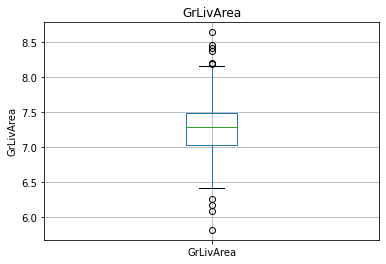

In [96]:
for feature in continuous:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [97]:
#now we'll analyse for Object features

In [98]:
len(obj_feature)

43

In [103]:
cat_obj=[features for features in obj_feature if len(dataset[features].unique())<26]
    

In [104]:
len(cat_obj)

43

In [105]:
#Thus all the object featres are categorical features

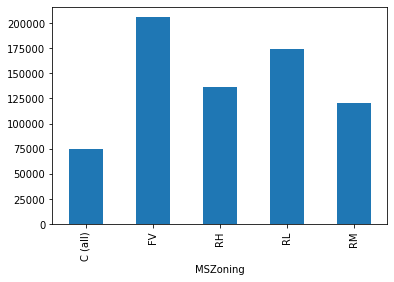

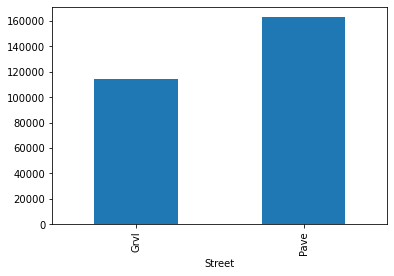

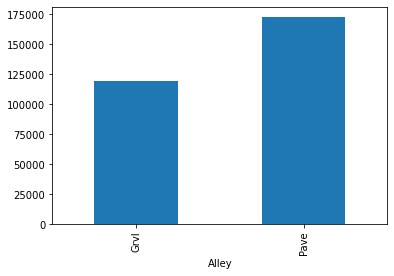

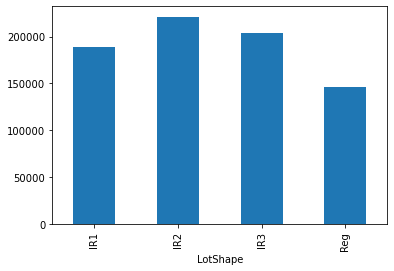

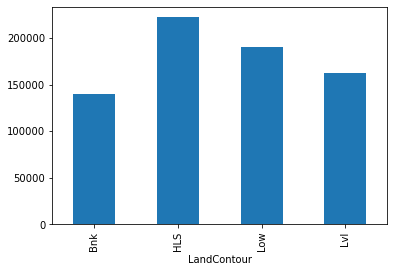

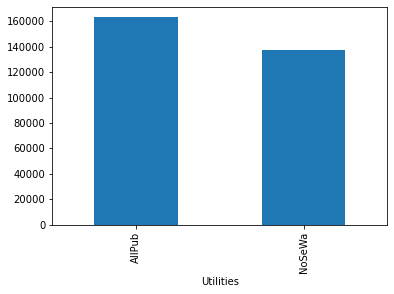

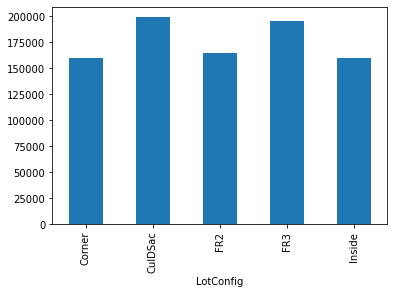

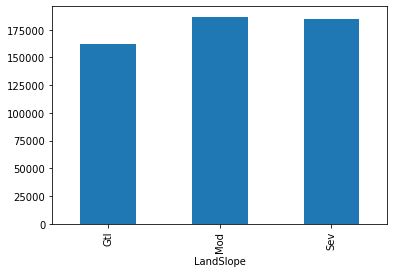

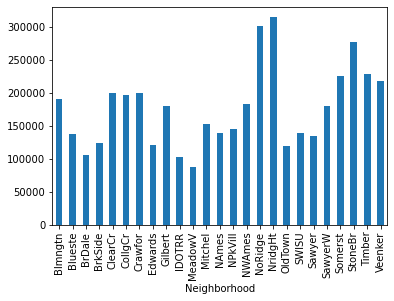

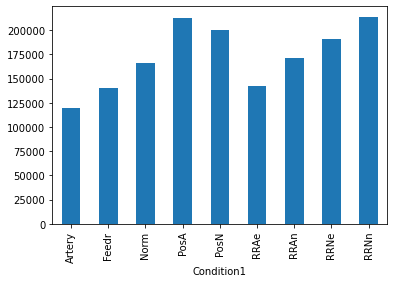

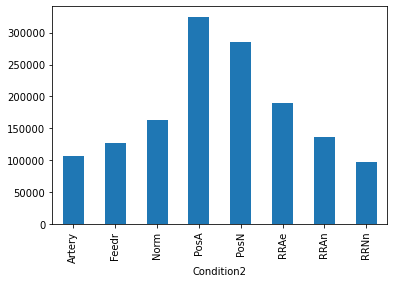

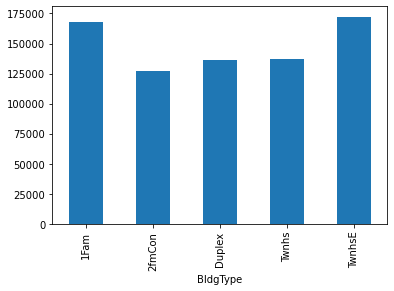

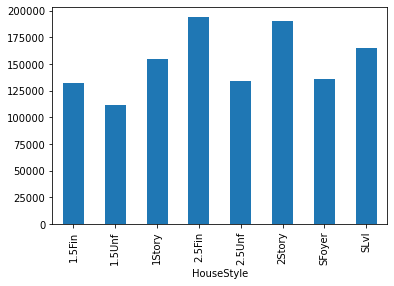

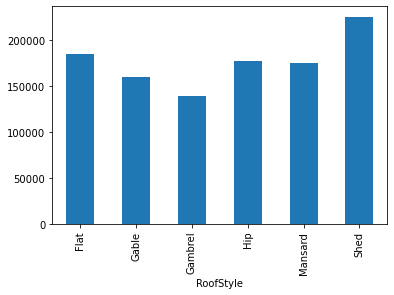

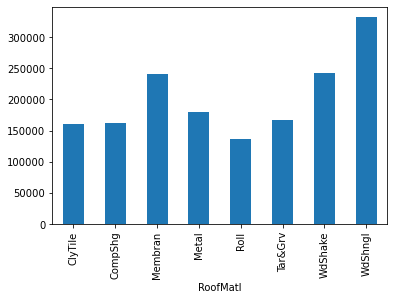

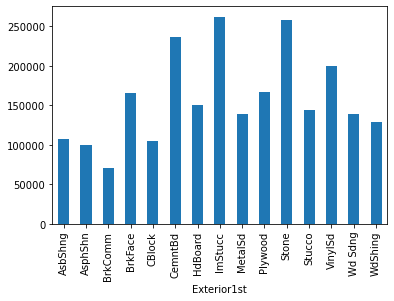

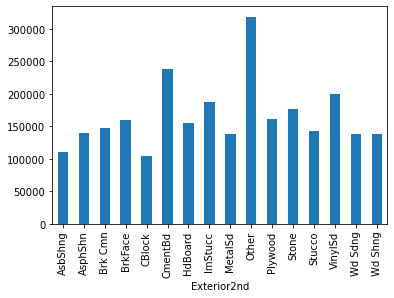

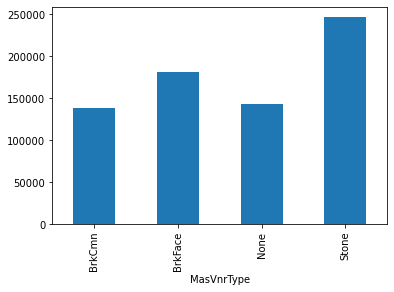

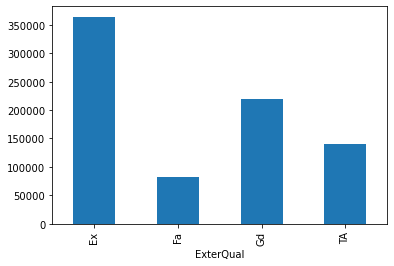

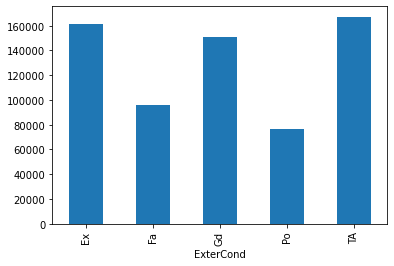

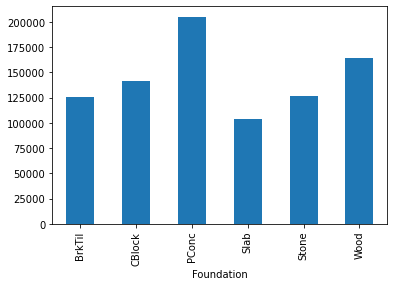

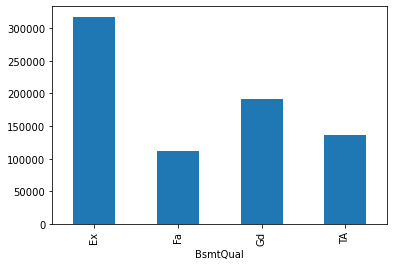

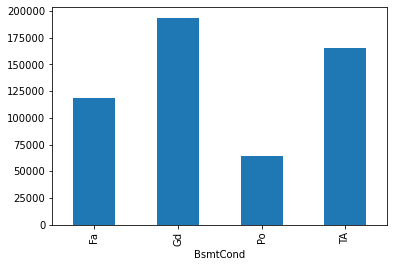

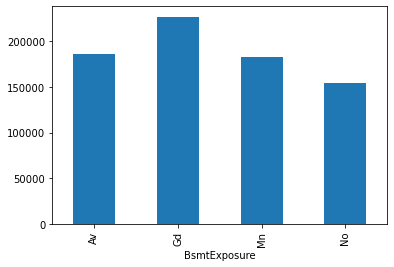

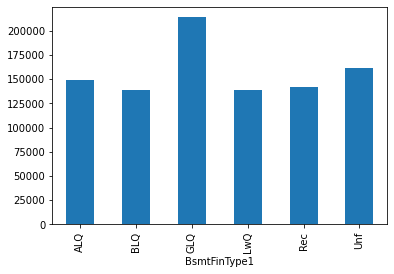

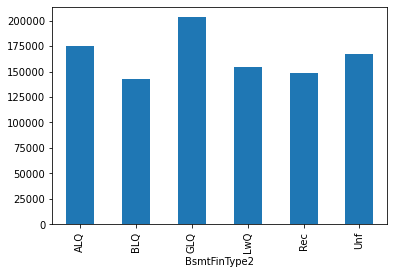

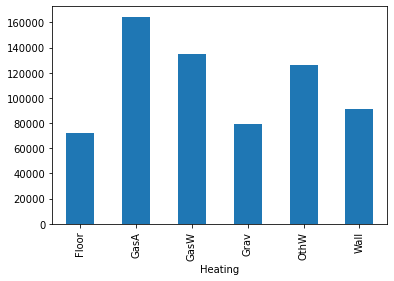

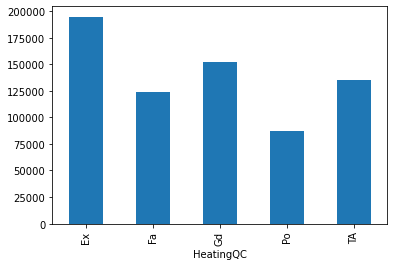

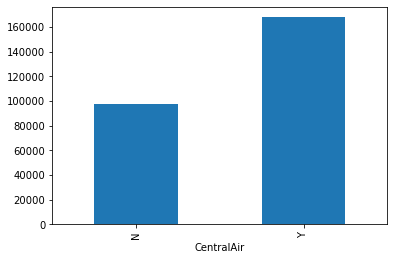

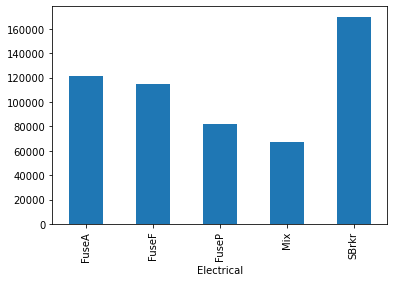

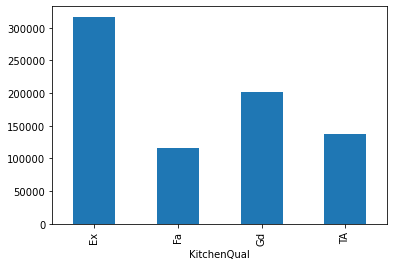

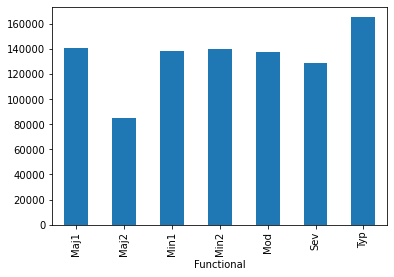

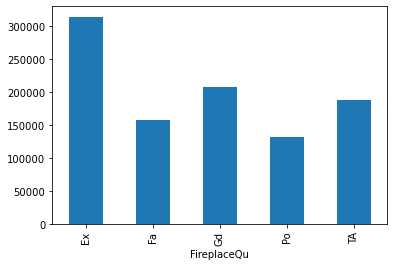

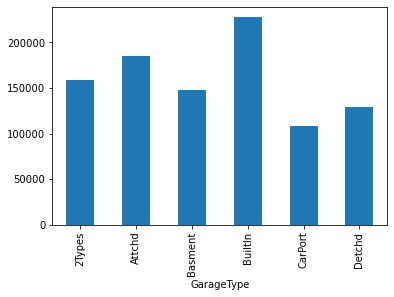

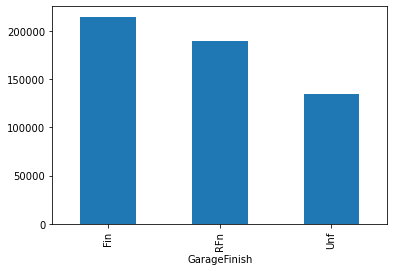

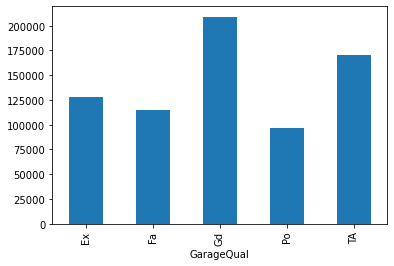

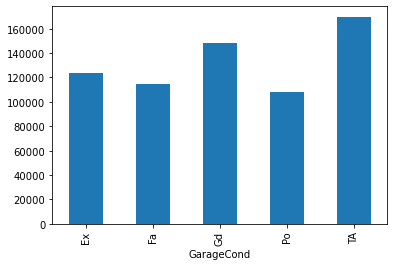

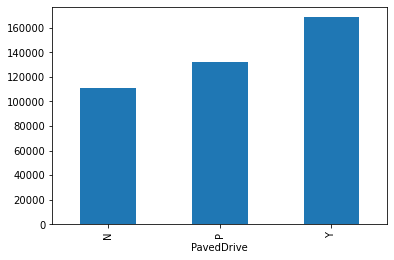

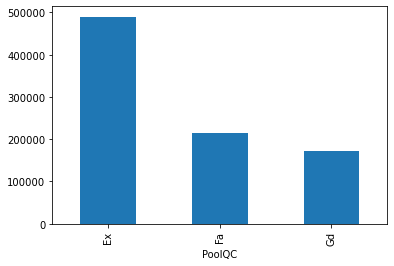

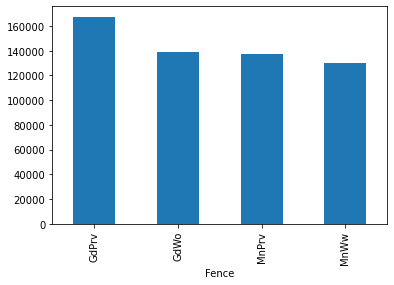

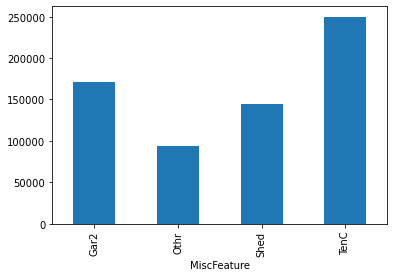

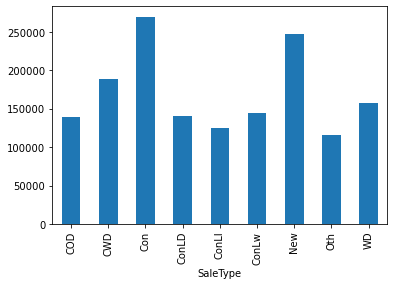

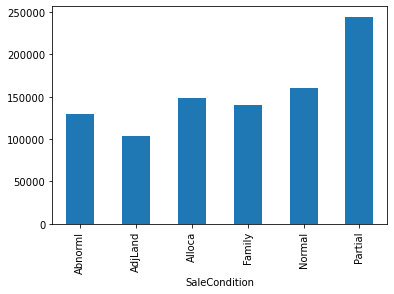

In [107]:
for feature in cat_obj:
    dataset.groupby(feature)["SalePrice"].median().plot.bar()
    plt.show()